<a href="https://colab.research.google.com/github/saad1ibn2akhter/AI_Olympiad_problems_and_solutions/blob/main/Supervised_learning_training_ground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
from sklearn.metrics import accuracy_score



In [78]:
df = pd.read_csv('Obesity_level_prediction_dataset.csv')
print(df.head(2))
print(df.info())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE       CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0         no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0  Sometimes   

                  MTRANS     NObeyesdad  
0  Public_Transportation  Normal_Weight  
1  Public_Transportation  Normal_Weight  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null  

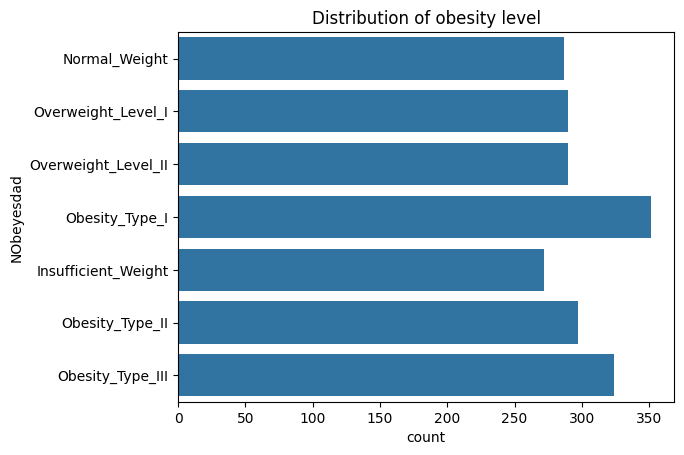

In [79]:
sns.countplot(y = 'NObeyesdad' , data=df)
plt.title("Distribution of obesity level")
plt.show()

In [80]:
#use standardScaler for the continuous data type
continuous_columns = df.select_dtypes(include=[ 'float64']).columns.tolist()
print(continuous_columns)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[continuous_columns])

scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns) )

scaled_data = pd.concat( [ df.drop(columns= continuous_columns) ,scaled_df ] ,axis=1)
print(scaled_data.head(2))
#well prepared to use

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
   Gender family_history_with_overweight FAVC       CAEC SMOKE  SCC  \
0  Female                            yes   no  Sometimes    no   no   
1  Female                            yes   no  Sometimes   yes  yes   

        CALC                 MTRANS     NObeyesdad       Age    Height  \
0         no  Public_Transportation  Normal_Weight -0.522124 -0.875589   
1  Sometimes  Public_Transportation  Normal_Weight -0.522124 -1.947599   

     Weight      FCVC       NCP      CH2O       FAF       TUE  
0 -0.862558 -0.785019  0.404153 -0.013073 -1.188039  0.561997  
1 -1.168077  1.088342  0.404153  1.618759  2.339750 -1.080625  


In [81]:
#use OneHotEncoder in order to covnert categorical values into numeric data

categorical_columns = df.select_dtypes(include = ['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')
# print(categorical_columns)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

encoded_df = pd.DataFrame(encoded_features , columns = encoder.get_feature_names_out(categorical_columns))

prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns) , encoded_df],axis=1)

prepped_data.head(2)

#now encode the Y variable

# prepped_data['']
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()


,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [82]:
X = prepped_data.drop(columns='NObeyesdad',axis=1)
y = prepped_data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [83]:
#OneVsAllClassifier

model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

y_pred_ova = model_ova.predict(X_test)

print("one vs rest classifier ")

print(f"Accuracy : {np.round(100*accuracy_score(y_pred_ova, y_test),2)} %")



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


one vs rest classifier 
Accuracy : 76.12 %


In [84]:
#One vs one classifier

model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train,y_train)

y_pred_ovo = model_ovo.predict(X_test)

print("one vs one classifier ")

print(f"Accuracy : {np.round(100*accuracy_score(y_pred_ovo, y_test),2)} %")


one vs one classifier 
Accuracy : 92.2 %


In [ ]:
#FOR FUTURE USES : MAYBE 🤔🤷


def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])

    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column

    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Call the pipeline function with file_path
obesity_risk_pipeline(file_path, test_size=0.2)